<a href="https://colab.research.google.com/github/hongsunjang/hands-on-ML/blob/main/Lecture_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

차원의 저주 -> MNIST 데이터 셋만해도 784개의 feature size 

## 대표적인 접근방법
1. projection

2. manifold learning

## 가장 인기있는 차원축소 기법
1. PCA

2. 커널 PCA

3. LLE

# 차원의 저주

차원이 높아질 수록 대다수의 점들이 경계선에 가까워진다.

차원이 높아질수록 임의의 두점 사이의 거리가 매우 멀어진다.
=> 고차원 데이터셋이 매우 sparse할 수 있음을 의미 ( 예측 샘플또한 훈련 샘플과 멀리 떨어져 있을 확률이 높다)

# 투영 (projection)

고차원 데이터 셋이라고 해도 어떤 특성들은 서로 강하게 연관되어있기 때문에 subspace에 위치한다.
따라서 해당 subspace 에 projection을 수행할 수 있다.

# 매니폴드 학습( maifold learning)

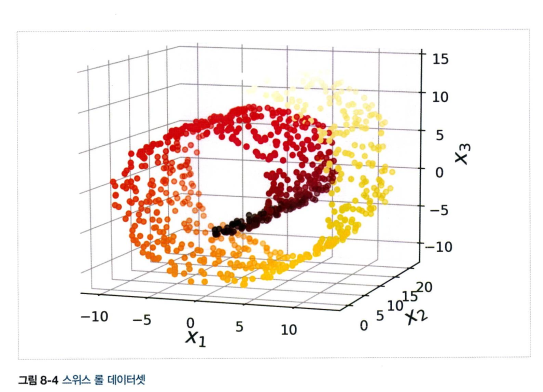

스위스 롤 데이터셋은 2D manifold의 한 예입니다.
manifold assumption을 바탕으로 실제 고차원데이터셋이 더 낮은 저차원 매니폴드에 가깝게 놓여있다고 한다. 이렇게 매니폴드를 모델링할 수 있다.

# PCA: 주성분 분석 principle component analysis
: 데이터에 가장 가까운 초평면(hyperplane) 을 정의한다

1. 분산 보존
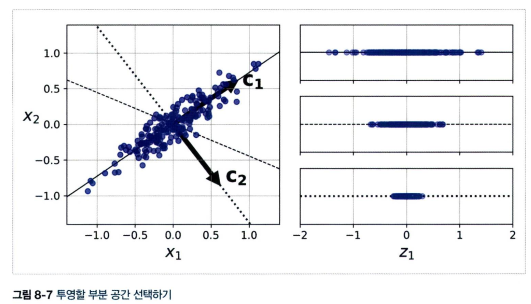

 => 분산 보존을 위해 원본 데이터셋과 투영과의 평균제곱거리를 최소화하는 것과 같다

SVD이용 특이값분해 -> 표준행렬 분해가능하다. 훈련세트 행렬 X를 세개의 행렬 곱셈으로 분해할 수 있다.
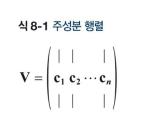

In [2]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

# 평균을 0이라고 가정해도 괜찮다.
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

Screenshot from 2022-02-03 17-42-30.png

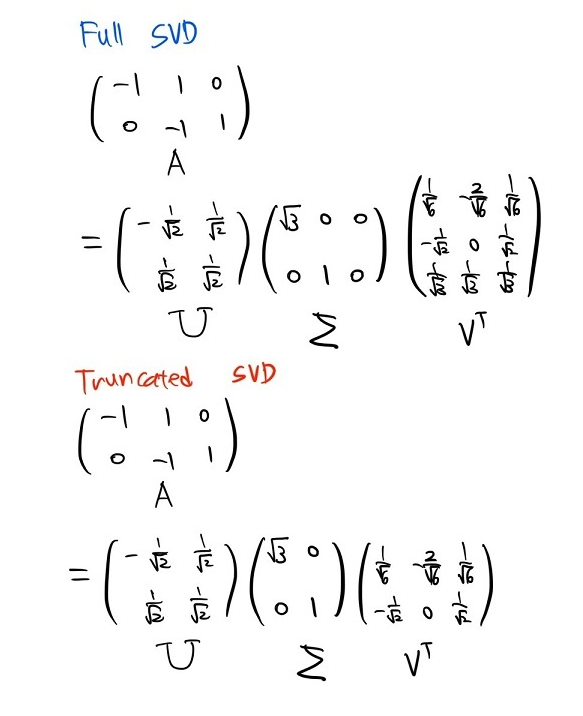

m x n 행렬에 대한 특이값분해(SVD)

U는 AAT를 고유값분해(eigendecomposition)해서 얻어진 직교행렬(orthogonal matrix)

AT, ATA를 고유값분해해서 나오는 고유값(eigenvalue)들의 square root를 대각원소로 하는 m x n 직사각 대각행렬

V는 ATA를 고유값분해해서 얻어진 직교행렬로서 V 의 열벡터들을 A의 right singular vector라 부른다

In [3]:
X_centered = X - X.mean(axis=0)

# 특이값 분해로 3개의 벡터로 분해해주는 라이브러리 함수
# U: s: 대각행렬, Vt : 각 성분 표준행렬
U, s, Vt = np.linalg.svd(X_centered) # -> default : truncated SVD

# 주성분 벡터 
c1 = Vt.T[:,0] # Transpose matrix 의 첫번째 데이터에 대한 singular vector
c2 = Vt.T[:,1] # transpose matrix의 두번째 데이터에 대한 singular vector

In [4]:
W2 = Vt.T[:,:2]
X2D = X_centered.dot(W2) # c1, c2에 대해서 투영

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X2D = pca.fit_transform(X)

In [6]:
pca.explained_variance_ratio_ # 3번째 차원에는 variance가 얼마 남아잇을까?

# 항상 차원을 2차원으로 축소할 수는 없다 -> 95% 분산합까지 축소하고싶을때는 어떻게 해야할까?

array([0.84248607, 0.14631839])

In [7]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [8]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d= np.argmax(cumsum>=0.95) + 1

d #필요한 차원의 수 2

2

In [9]:
pca = PCA(n_components = d)
X_reduced = pca.fit_transform(X)

In [10]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
# MNIST dataset
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced) # inverse_transform으로 복원도 가능하다.

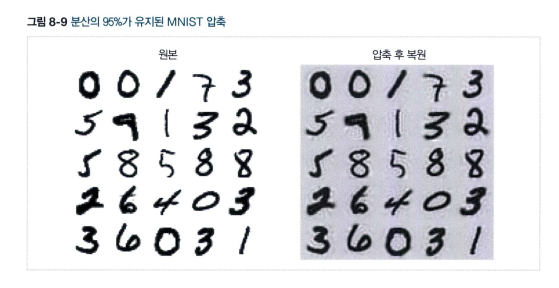

# Randomized PCA

In [12]:
# randomized PCA -> 근사 행렬 찾는 것 (default는 auto이다. d가 n의 80%보다 크면 자동으로 randomized PCA, d가 작을수록 빠르다)
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train) 

# Incremental PCA

In [13]:
# mini batch 마다 PCA알고리즘을 적용합니다.

from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components = 154)
for X_batch in np.array_split(X_train, n_batches):
  inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

# 커널 PCA
Kernel trick ! 
5장에서 배웠던 SVM의 특성 고차원 공간에서 선형 SVM은 원본 공간에서 고차원 SVM과 같다!

In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel = "rbf" , gamma = 0.04)

X_reduced = rbf_pca.fit_transform(X)


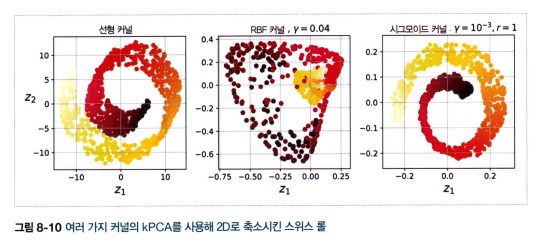

# 커널 PCA의 학습

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import numpy as np

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

In [ ]:
print(grid_search.best_params_)

# How to invert KernelPCA
 => invert를 위한 모델 트레이닝 필요

# Locally Linear embedding : LLE 선형 지역 임베딩 

# 위 PCA는 모두 투영이다 하지만 Locally linear embedding같은 경우 Manifold방법

In [3]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [4]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components = 2 , n_neighbors = 10)
X_reduced = lle.fit_transform(X)

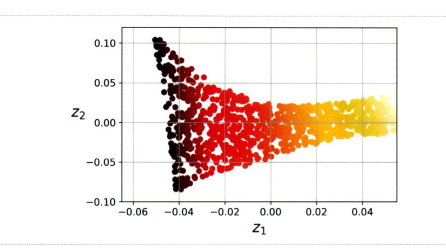

 # LLE의 구현
 1. Neighbor를 구한다
 2. k개의 Neighbor들은 locally linear 하다고 가정하고 이웃 wi,j * x_j = x_i가 되는 w_i,j를 구한다. 
 3. 이때 w_i,j 의 합은 1로 normalize한다.
 4. w 가중치를 고정한다
 5. 샘플이미지(상) z_i - w_i,j * z_i 가 최소가 되는 image(상)을 찾는다.

 ## 저차원 표현을 만드는데 O(dm^2) 이라 대량의 데이터셋에 적용할 수없다.m= dataset 크기

# sklearn에서 지원하는 축소기법
1. random projection: 랜덤한 선형투영 => 놀랍게도 잘 동작한다.
2. MDS(multi dimensional scaling): 샘플 간 거리를 유지하며 축소
3. Isomap: 각 샘플을 가장 가까운 이웃과 연결, geodesic distance를 유지(두 노드 사이 최단 경로를 이루는 노드 수)
4. t-SNE : 비슷한 샘플은 가까이 비슷하지 않은 샘플은 멀리 차워 ㄴ축소(시각화에 자주 사용)
5. LDA: 클래스 분류기를 훈련시키고 가능한 한 클래스를 다른 클래스로부터 멀리떨어지게 유지해준다